## CROHME EDA

This is the exploratory data analysis of the ICDAR CROHME 2023 dataset

CROHME 2023, an extension of the CROHME dataset series, features the OffHME (Offline Handwritten Mathematical Expressions) subset designed for evaluating offline recognition systems. This subset contains handwritten mathematical expressions representing diverse mathematical symbols and structures, providing annotations for ground truth comparisons. Noteworthy is its variability in handwriting styles, presenting a challenge for accurate interpretation by recognition systems. The dataset supports both training and evaluation of recognition models, mirroring real-world scenarios where users write entire expressions before recognition, making it a valuable resource for advancing handwritten math recognition technology.

The OffHME subset of the CROHME 2023 dataset offers researchers and practitioners a comprehensive dataset for testing and enhancing offline recognition systems for handwritten mathematical expressions. With its annotations and diverse handwriting styles, it facilitates accurate evaluation of recognition algorithms. This subset's focus on offline recognition aligns with real-world usage scenarios, such as digital note-taking and educational platforms, making it a pivotal resource for improving the accuracy and reliability of handwritten math recognition systems.

In [35]:
# Import Required Libraries
import glob
import random
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, Markdown, Latex

In [36]:
# Set input and output paths
project_path = '/Users/sumukhiganesan/GitHub/'
data_path = project_path + 'data/'
crohme_path = data_path + 'TC11_CROHME23/'

In [37]:
# CROHME23 OffHME paths
off_img_path = crohme_path + 'IMG/train/OffHME/'
off_lg_path = crohme_path + 'SymLG/train/OffHME/'

In [38]:
# OffHME info
ls_image_paths = glob.glob(off_img_path + '*')
ls_graph_paths = glob.glob(off_lg_path + '*')
print("Number of images in OffHME:", len(ls_image_paths))
print("Number of symbol-level label graphs in OffHME:", len(ls_graph_paths))

Number of images in OffHME: 10000
Number of symbol-level label graphs in OffHME: 10000


In [62]:
# Sample Image and Graph
sample_image_path = off_img_path + '00095.png'
# sample_image_path = random.sample(ls_image_paths, 1)[0]
sample_graph_path = sample_image_path.replace('IMG', 'SymLG').replace('.png','.lg')

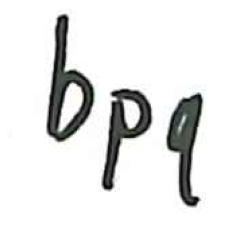

In [63]:
# Load sample image
img = cv2.imread(sample_image_path) 
plt.imshow(img)
plt.axis("off")
plt.show()

In [64]:
# Function to read and parse .lg file
def parse_lg_file(file_path):
    latex_expression = None
    object_info = []
    relationships = []
    bbox = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith('# LaTeX'):
            latex_expression = line.split(', ')[1].strip()
        elif line.startswith('O'):
            obj = line.split(', ')[1:5]
            obj[-1] = obj[-1].replace('\n','')
            object_info.append(obj)
        elif line.startswith('R'):
            rs = line.split(', ')[1:]
            # print(rs)
            rs[-1] = rs[-1].replace('\n','')
            relationships.append(rs)
        elif line.startswith('BB'):
            bb = line.split(', ')[1:6]
            bb[-1] = bb[-1].replace('\n','')
            bb[1:5] = map(float, bb[1:5])
            bbox.append(bb)

    return latex_expression, object_info, relationships, bbox

In [65]:
# Load sample graph and print info
latex_expression, object_info, relationships, bbox = parse_lg_file(sample_graph_path)
print("Latex:")
print(latex_expression)

display(Latex(latex_expression))

print("Objects:")
for i in range(len(object_info)):
    print(object_info[i], bbox[i])

print("\nRelationships:")
for i in range(len(relationships)):
    print(relationships[i])

Latex:
$b _ { p q }$


<IPython.core.display.Latex object>

Objects:
['b_2', 'b', '1.0', 'O'] ['b_2', 29.4528, 100.8913, 65.1034, 5.3476]
['p_4', 'p', '1.0', 'OSub'] ['p_4', 70.6292, 139.2157, 108.0624, 61.3191]
['q_5', 'q', '1.0', 'OSubR'] ['q_5', 146.0303, 149.9109, 118.2228, 64.8841]

Relationships:
['b_2', 'p_4', 'Sub', '1.0']
['p_4', 'q_5', 'Right', '1.0']


(200, 795, 3)


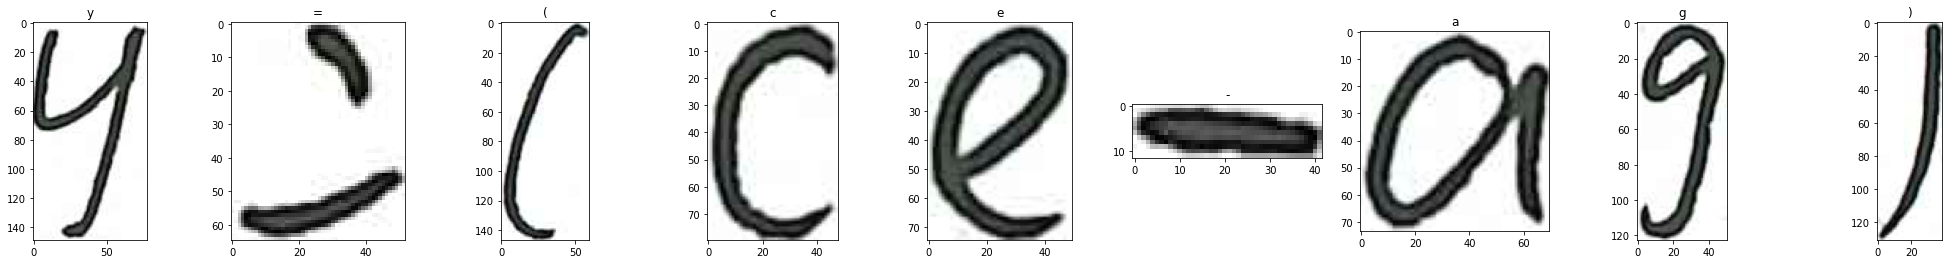

In [61]:
# Split expression into symbols
image_height, image_width, _ = img.shape
print(img.shape)
num_objects = len(object_info)

fig, ax = plt.subplots(1, num_objects, figsize=(num_objects * 4, 4))

for i in range(num_objects):
    bbox_coords = tuple(map(int, bbox[i][1:5]))
    x_min = min(bbox_coords[1], bbox_coords[3])
    x_max = max(bbox_coords[1], bbox_coords[3])
    y_min = min(bbox_coords[0], bbox_coords[2])
    y_max = max(bbox_coords[0], bbox_coords[2])
    symbol = img[x_min:x_max, y_min:y_max]
    ax[i].imshow(symbol)
    ax[i].set_title(object_info[i][1])